## Import packages

In [2]:
from IPython.display import display
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read data

In [3]:
sou_rec_pos = pd.read_pickle("sou_rec_pos.pkl")
sou_rec_pos

,EnergySourcePoint,SourceX,SourceY,GroupX,GroupY,ReceiverGroupElevation,SourceSurfaceElevation,SourceDepth,ReceiverX,ReceiverY,SourceX_new,SourceY_new
0,1,1182365,1105911,1181982,1106233,1121,1137,0,129721.989048,1613693.001835,130221.977786,1613712.604415
1,1,1182365,1105911,1182018,1106201,1099,1137,0,129770.152167,1613693.56209,130221.977786,1613712.604415
2,1,1182365,1105911,1182053,1106169,1090,1137,0,129817.575656,1613693.449333,130221.977786,1613712.604415
3,1,1182365,1105911,1182089,1106137,1082,1137,0,129865.738776,1613694.009589,130221.977786,1613712.604415
4,1,1182365,1105911,1182124,1106105,1073,1137,0,129913.162265,1613693.896832,130221.977786,1613712.604415
...,...,...,...,...,...,...,...,...,...,...,...,...
3566873,3645,1201128,1105871,1200942,1106056,323,319,0,143864.517823,1626322.404387,144126.596522,1626310.752962
3566874,3645,1201128,1105871,1200978,1106024,321,319,0,143912.680943,1626322.964643,144126.596522,1626310.752962
3566875,3645,1201128,1105871,1201013,1105992,321,319,0,143960.104432,1626322.851885,144126.596522,1626310.752962
3566876,3645,1201128,1105871,1201049,1105959,320,319,0,144008.940564,1626322.67251,144126.596522,1626310.752962


## Topography map

In [6]:
rec_pos_ele=sou_rec_pos.drop_duplicates(subset=['ReceiverX','ReceiverY'])
x=rec_pos_ele['ReceiverX'].to_numpy().astype('f')
y=rec_pos_ele['ReceiverY'].to_numpy().astype('f')
z=rec_pos_ele['ReceiverGroupElevation'].to_numpy().astype('f')
xmin=rec_pos_ele['ReceiverX'].min()
xmax=rec_pos_ele['ReceiverX'].max()
ymin=rec_pos_ele['ReceiverY'].min()
ymax=rec_pos_ele['ReceiverY'].max()
tx = np.linspace(xmin, xmax, 100)
ty = np.linspace(ymin, ymax, 100)
XI, YI = np.meshgrid(tx, ty)
#Creating the interpolation function and populating the output matrix value
from scipy.interpolate import Rbf
rbf = Rbf(x, y, z, function='linear')
ZI = rbf(XI, YI)

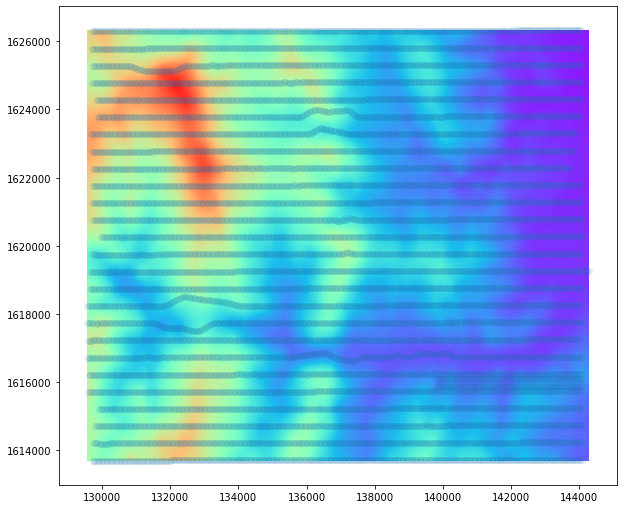

In [14]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(ZI, cmap=plt.cm.rainbow, alpha=.9, 
           interpolation='bilinear', origin='lower',
           extent=(xmin, xmax, ymin, ymax))
plt.scatter(rec_pos_ele['ReceiverX'],rec_pos_ele['ReceiverY'], alpha=0.1)
plt.show()